In [1]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
print(f"GPU device name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

!pip install scrapy beautifulsoup4 pyarabic farasapy transformers

GPU available: True
GPU device name: Tesla T4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.6 MB/s eta 0:00:00


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random

# List of Arabic news websites
websites = [
    "https://www.bbc.com/arabic",
    "https://arabic.cnn.com/",
    "https://www.hespress.com/",
    "https://arabic.cnn.com/",
    "https://cnnbusinessarabic.com/sectors/1116735/%D8%A7%D9%84%D9%87%D9%86%D8%AF-%D8%AA%D8%B9%D8%AA%D8%B2%D9%85-%D8%A7%D9%84%D8%AD%D8%AF-%D9%85%D9%86-%D8%AA%D8%AF%D9%81%D9%82-%D8%A7%D9%84%D9%88%D8%A7%D8%B1%D8%AF%D8%A7%D8%AA-%D8%A7%D9%84%D8%B1%D8%AE%D9%8A%D8%B5%D8%A9-%D8%A7%D9%84%D9%82%D8%A7%D8%AF%D9%85%D8%A9-%D9%85%D9%86-%D8%A7%D9%84%D8%B5%D9%8A%D9%86-%D8%A8%D8%B1%D8%B3%D9%88%D9%85-%D9%85%D8%A4%D9%82%D8%AA%D8%A9",
    "https://www.aljazeera.net/ebusiness/2025/4/21/%D9%88%D8%AB%D8%A7%D8%A6%D9%82-%D8%A8%D9%86%D9%85%D8%A7-%D8%AD%D9%8A%D9%86-%D8%AA%D8%AD%D9%88%D9%84%D8%AA-%D8%A7%D9%84%D9%85%D9%84%D8%A7%D8%B0%D8%A7%D8%AA",
    "https://www.aljazeera.net/news/2025/4/21/%D8%A5%D8%AF%D8%A7%D9%86%D8%A9-%D8%A3%D8%B1%D8%AF%D9%86%D9%8A%D8%A9",
    "https://www.aljazeera.net/encyclopedia/2024/9/17/%D9%81%D9%84%D8%B3%D8%B7%D9%8A%D9%86-2-%D8%B5%D8%A7%D8%B1%D9%88%D8%AE-%D9%81%D8%B1%D8%B7-%D8%B5%D9%88%D8%AA%D9%8A-%D9%8A%D9%85%D9%86%D9%8A-%D8%A7%D8%AE%D8%AA%D8%B1%D9%82-%D8%B3%D9%85%D8%A7%D8%A1",
    "https://www.aljazeera.net/ebusiness/2025/4/21/trkiye-expands-regional-oil-gas-exploration",
    "https://www.aljazeera.net/culture/2025/4/21/%D8%A7%D9%84%D8%B1%D9%88%D8%A7%D8%A6%D9%8A-%D8%A7%D9%84%D8%AC%D8%B2%D8%A7%D8%A6%D8%B1%D9%8A-%D9%88%D8%A7%D8%B3%D9%8A%D9%86%D9%8A-%D8%A7%D9%84%D8%A3%D8%B9%D8%B1%D8%AC",

    # Add more sites as needed
]

collected_texts = []

# Scrape text from each website
for website in websites[:2]:  # Limiting to first 2 for demonstration
    try:
        response = requests.get(website, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract paragraphs (adjust selectors based on website structure)
        paragraphs = soup.find_all("p")
        paragraphs = paragraphs + soup.find_all("h1")
        paragraphs = paragraphs + soup.find_all("h2")

        for p in paragraphs:
            text = p.get_text().strip()
            # Filter for Arabic text with decent length
            if len(text) > 100 and re.search(r'[\u0600-\u06FF]', text):
                collected_texts.append(text)
    except Exception as e:
        print(f"Error scraping {website}: {e}")

# Create a dataset with assigned scores (simulated for this example)
data = []
for text in collected_texts[:20]:  # Limiting to first 20 texts
    score = round(random.uniform(0, 10), 1)
    data.append({"text": text, "score": score})

df = pd.DataFrame(data)
print(f"Collected {len(df)} texts")
print(df.head())

df.to_csv('arabic_texts.csv', index=False)


Collected 20 texts
                                                text  score
0  قال الكاردينال كيفن فيريل، أمين سرّ الفاتيكان،...    3.5
1  عملية انتخاب البابا في الفاتيكان هي طقس ديني و...    2.2
2  العلاقة المتميزة التي ربطت البابا فرنسيس بالشر...    5.1
3  شهدت حبرية البابا فرنسيس عددا من القضايا غير ا...    7.0
4  يشهد العالم في العقود الأخيرة تراجعاً في وتيرة...    5.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    20 non-null     object 
 1   score   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [11]:
import re
import numpy as np
from pyarabic import araby
from farasa.stemmer import FarasaStemmer


stemmer = FarasaStemmer()

def preprocess_arabic_text(text):
    # Remove diacritics
    text = araby.strip_tashkeel(text)

    # Remove non-Arabic characters and extra spaces
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = araby.tokenize(text)

    # Stemming
    stems = [stemmer.stem(token) for token in tokens]

    # Remove Arabic stop words (you might need a comprehensive list)
    arabic_stop_words = set(['من', 'إلى', 'في', 'على', 'عن', 'مع', 'هذا', 'هذه', 'ذلك', 'تلك'])
    filtered_stems = [token for token in stems if token not in arabic_stop_words]

    return " ".join(filtered_stems)

# Apply preprocessing to all texts
df['processed_text'] = df['text'].apply(preprocess_arabic_text)
df.head()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [08:33<00:00, 470kiB/s]


,text,score,processed_text
0,قال الكاردينال كيفن فيريل، أمين سرّ الفاتيكان،...,3.5,قال كردنال كيفن فيريل ، أمين سر فاتيكان ، بيان...
1,عملية انتخاب البابا في الفاتيكان هي طقس ديني و...,2.2,عملية انتخاب بابا فاتيكان هي طقس ديني سياسي مع...
2,العلاقة المتميزة التي ربطت البابا فرنسيس بالشر...,5.1,علاقة متميز الذي ربط بابا فرنسيس شرق أوسط لم ا...
3,شهدت حبرية البابا فرنسيس عددا من القضايا غير ا...,7.0,شهد حبر بابا فرنسيس عدد قضية غير مسبوق ، فضل س...
4,يشهد العالم في العقود الأخيرة تراجعاً في وتيرة...,5.6,شهد عالم عقد أخير تراجع وتيرة نمو اقتصادي معدل...


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Tokenize and convert to indices
from collections import Counter

# Create vocabulary from processed texts
all_words = ' '.join(df['processed_text']).split()
word_counts = Counter(all_words)
vocabulary = {word: idx + 1 for idx, (word, _) in enumerate(word_counts.most_common())}
vocabulary[''] = 0

# Convert texts to sequences of indices
def text_to_sequence(text, max_length=100):
    words = text.split()
    sequence = [vocabulary.get(word, 0) for word in words[:max_length]]
    if len(sequence) < max_length:
        sequence += [0] * (max_length - len(sequence))
    return sequence

df['sequence'] = df['processed_text'].apply(text_to_sequence)

# Normalize scores to [0, 1]
scaler = MinMaxScaler()
df['normalized_score'] = scaler.fit_transform(df[['score']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    list(df['sequence']),
    list(df['normalized_score']),
    test_size=0.2,
    random_state=42
)

# Create dataset and dataloader
class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = [torch.tensor(seq, dtype=torch.long) for seq in sequences]
        self.labels = [torch.tensor([label], dtype=torch.float) for label in labels]

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Create DataLoaders
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [13]:
class SimpleRNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SimpleRNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# 2. Bidirectional RNN
class BiRNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(BiRNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        # Concatenate final forward and backward hidden states
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        return self.fc(hidden)

# 3. LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden.squeeze(0))

# 4. GRU Model
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.gru(embedded)
        return self.fc(hidden.squeeze(0))

In [16]:
def train_model(model, train_loader, test_loader, optimizer, criterion, epochs=10):
    model.to(device)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0

        for batch_idx, (texts, labels) in enumerate(train_loader):
            texts, labels = texts.to(device), labels.to(device)

            optimizer.zero_grad()
            predictions = model(texts)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Evaluation phase
        model.eval()
        test_loss = 0
        predictions_list = []
        actual_list = []

        with torch.no_grad():
            for texts, labels in test_loader:
                texts, labels = texts.to(device), labels.to(device)
                predictions = model(texts)
                loss = criterion(predictions, labels)
                test_loss += loss.item()

                predictions_list.extend(predictions.cpu().numpy())
                actual_list.extend(labels.cpu().numpy())

        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        print(f'Epoch: {epoch+1}')
        print(f'Train Loss: {train_loss:.4f}')
        print(f'Test Loss: {test_loss:.4f}')

        # Convert back to original scale for MSE calculation
        pred_orig = scaler.inverse_transform(np.array(predictions_list))
        actual_orig = scaler.inverse_transform(np.array(actual_list))
        mse = np.mean((pred_orig - actual_orig) ** 2)
        print(f'Test MSE (original scale): {mse:.4f}')
        print('-' * 60)

    return train_losses, test_losses

# Initialize model parameters
vocab_size = len(vocabulary)
embedding_dim = 100
hidden_dim = 128
output_dim = 1
learning_rate = 0.001
epochs = 100

# Train each model
models = {
    "Simple RNN": SimpleRNNModel(vocab_size, embedding_dim, hidden_dim, output_dim),
    "Bidirectional RNN": BiRNNModel(vocab_size, embedding_dim, hidden_dim, output_dim),
    "LSTM": LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim),
    "GRU": GRUModel(vocab_size, embedding_dim, hidden_dim, output_dim)
}

results = {}

for name, model in models.items():
    print(f"Training {name} model...")
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    train_losses, test_losses = train_model(
        model, train_loader, test_loader, optimizer, criterion, epochs
    )

    results[name] = {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "model": model
    }

Training Simple RNN model...
Epoch: 1
Train Loss: 0.1715
Test Loss: 0.6180
Test MSE (original scale): 53.4484
------------------------------------------------------------
Epoch: 2
Train Loss: 0.2557
Test Loss: 0.4219
Test MSE (original scale): 36.4885
------------------------------------------------------------
Epoch: 3
Train Loss: 0.1462
Test Loss: 0.1758
Test MSE (original scale): 15.2034
------------------------------------------------------------
Epoch: 4
Train Loss: 0.0663
Test Loss: 0.1043
Test MSE (original scale): 9.0173
------------------------------------------------------------
Epoch: 5
Train Loss: 0.1175
Test Loss: 0.1011
Test MSE (original scale): 8.7471
------------------------------------------------------------
Epoch: 6
Train Loss: 0.1400
Test Loss: 0.1105
Test MSE (original scale): 9.5575
------------------------------------------------------------
Epoch: 7
Train Loss: 0.1008
Test Loss: 0.1600
Test MSE (original scale): 13.8377
-----------------------------------------

Evaluation for Simple RNN:
MSE: 15.6274
MAE: 3.7127
R2: -0.7891
------------------------------------------------------------
Evaluation for Bidirectional RNN:
MSE: 10.9903
MAE: 3.3057
R2: -0.2582
------------------------------------------------------------
Evaluation for LSTM:
MSE: 15.7042
MAE: 3.7200
R2: -0.7978
------------------------------------------------------------
Evaluation for GRU:
MSE: 20.3690
MAE: 4.2466
R2: -1.3319
------------------------------------------------------------


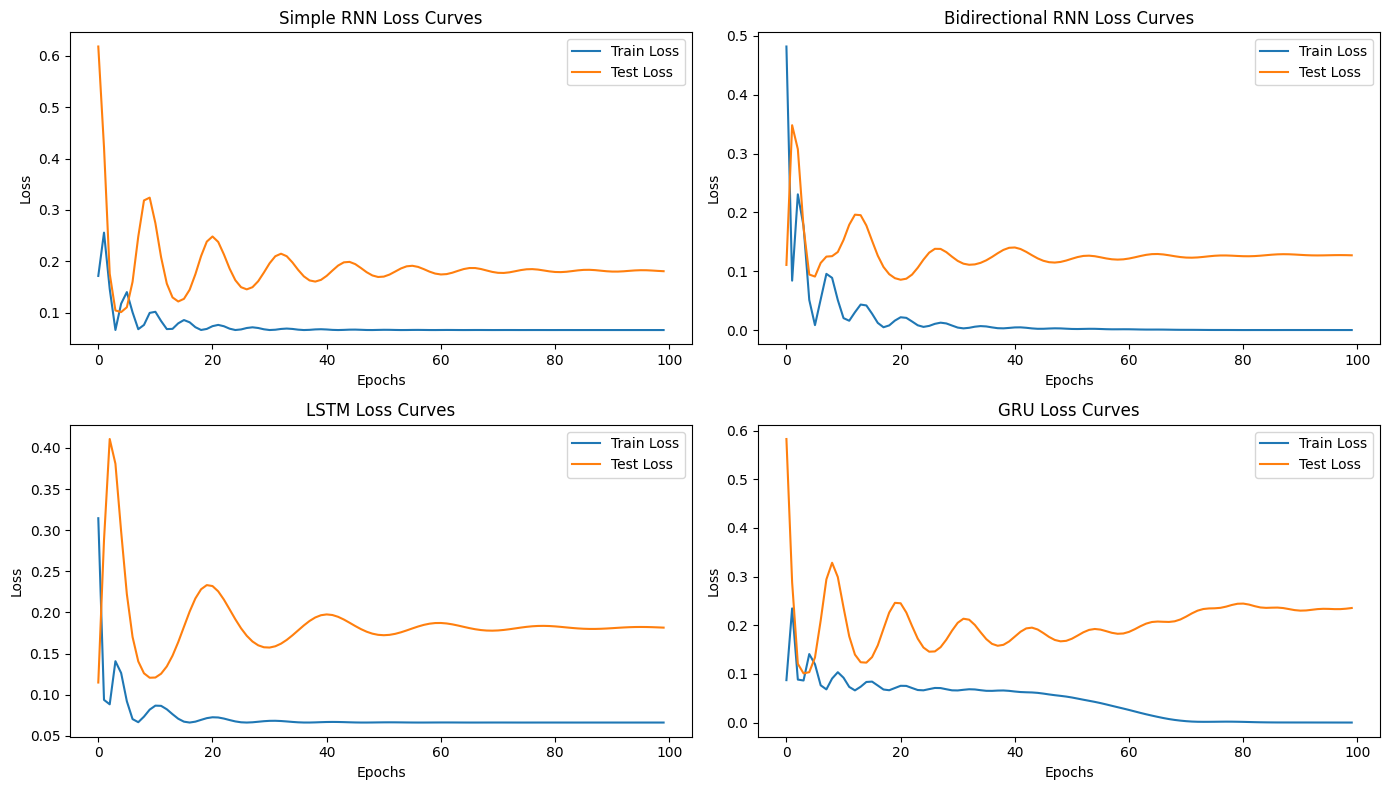

In [17]:
# Model evaluation and metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)

            output = model(texts)

            predictions.extend(output.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    # Convert back to original scale
    predictions = scaler.inverse_transform(np.array(predictions))
    actuals = scaler.inverse_transform(np.array(actuals))

    # Calculate metrics
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    return {
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    }

# Evaluate each model
evaluation_results = {}

for name, result in results.items():
    model = result["model"]
    metrics = evaluate_model(model, test_loader)
    evaluation_results[name] = metrics

    print(f"Evaluation for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * 60)

# Plot loss curves
plt.figure(figsize=(14, 8))

for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(result["train_losses"], label="Train Loss")
    plt.plot(result["test_losses"], label="Test Loss")
    plt.title(f"{name} Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

plt.tight_layout()
plt.show()